# Item-based kNN Collaborative Filtering

Collaborative filtering considers users’ opinion on different products and recommends the best products based on the products’ previous rankings and the opinion of other similar types of users. 

Here we focus on non-probablistic collaborative filtering algorithms, which can be divided to two categories: **memory-based** and **model-based**. 

Memory-based algorithm is essentially linear algebra calculation and can be implemented with **k-nearest neighbors**. Model-based algorithm involves matrix factorization, and will be detailed in the next notebook. 

**Item-based** collaborative filtering is the common practice in recommender systems. The intuition is to generate predictions based on similarities between items. 

Item-based collaborative filtering was developed by Amazon. It is faster when there are more users than items. It is also more stable because the average rating received by an item usually doesn’t change as quickly as the average rating given by a user to different items. 

The advantage of item-based collaborative filtering is that it does not require knowledge about the product. 

### import requirements

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from collections import Counter

Source: [surprise documentation](https://surprise.readthedocs.io/en/stable/getting_started.html)

In [2]:
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [3]:
# load data
df = pd.read_csv('../ratings_item0.csv', index_col=0)
df.head(3)

,uid,bid,rating
10,276746,0425115801,0
11,276746,0449006522,0
12,276746,0553561618,0


In [4]:
df.shape

(456182, 3)

In [5]:
num_users = len(set(df['uid']))
num_books = len(set(df['bid']))
print(f'There are {num_users} users and {num_books} books in this dataset.')

There are 13808 users and 18318 books in this dataset.


### data loading

In [6]:
reader = Reader(rating_scale=(1,10))

In [7]:
data = Dataset.load_from_df(df[['uid', 'bid', 'rating']], reader)

## Parameter Search
`GridSearchCV(algo_class, param_grid, measures=[u'rmse', u'mae'], cv=None, refit=False, return_train_measures=False)`

`RandomizedSearchCV`

Parameters
- `param_grid`

        param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [1, 2]},
              'k': [2, 3],
              'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }

Attributes
- `best_estimmator`
- `best_score`
- `best_params`
- `cv_results`
        results_df = pd.DataFrame.from_dict(gs.cv_results)
- ...

In [8]:
param_grid = {
    #'bsl_options': {'method': ['als', 'sgd'],
                    #'reg_i': [10],
                    #'reg_u': [15],
                    #'reg': [0.02],
                    #'learning_rate': [0.005],
    #                'n_epochs': [10, 20]},
    'k': [10, 20],
    'sim_options': {'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],
                    'min_support': [1, 3],
                    'user_based': [False]}
}

In [9]:
gs = GridSearchCV(KNNWithMeans, 
                  param_grid, 
                  measures=['rmse', 'mae'], 
                  cv=3)

In [10]:
gs.fit(data)

Computing the cosine similarity matrix...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity ma

In [11]:
# # best RMSE score
# print(gs.best_score)

{'rmse': 3.664102153412124, 'mae': 2.947267041272275}


In [15]:
best_score = {'rmse': 3.664102153412124, 'mae': 2.947267041272275}
print(best_score)

{'rmse': 3.664102153412124, 'mae': 2.947267041272275}


In [12]:
# # combination of parameters that gave the best RMSE score
# print(gs.best_params['rmse'])

{'k': 20, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}


In [16]:
best_params = {'k': 20, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}
print(best_params)

{'k': 20, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}


In [13]:
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.head(3)

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_k,param_sim_options
0,3.846073,3.849013,3.854833,3.849973,0.003640,16,3.058602,3.063204,3.069003,3.063603,0.004256,12,134.707725,16.867275,30.158351,1.366566,"{'k': 10, 'sim_options': {'name': 'cosine', 'm...",10,"{'name': 'cosine', 'min_support': 1, 'user_bas..."
1,3.816284,3.810875,3.805585,3.810915,0.004368,13,3.079647,3.079919,3.072388,3.077318,0.003488,16,35.000325,5.021164,24.595603,1.078180,"{'k': 10, 'sim_options': {'name': 'cosine', 'm...",10,"{'name': 'cosine', 'min_support': 3, 'user_bas..."
2,3.688989,3.685699,3.695126,3.689938,0.003907,2,2.962880,2.958068,2.966861,2.962603,0.003595,2,15.781364,0.307351,26.059829,0.842187,"{'k': 10, 'sim_options': {'name': 'msd', 'min_...",10,"{'name': 'msd', 'min_support': 1, 'user_based'..."


In [14]:
results_df.to_csv('knn_basic_results.csv')

Save the hypertuning results so next time I don't have to run that again and can directly use the results. 

The lowest rmse is `3.664339` when `{'k': 20, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}` using `KNNWithMeans`.

### evaluation

In [17]:
#results_df = pd.read_csv('knn_basic_results.csv')

In [18]:
# results_df = results_df[
#     ['split0_test_rmse', 'rank_test_rmse', 
#      'params', 'param_k', 'param_sim_options']]

In [19]:
results_df = pd.concat([
    results_df.drop(['param_sim_options'], axis=1), 
    results_df['param_sim_options'].apply(pd.Series)
    ], axis=1)

In [20]:
results_df.to_csv('knn_basic_results_cleaned.csv')

In [6]:
results_df = pd.read_csv('knn_results_cleaned.csv', index_col=0)

In [21]:
results_df.sort_values(by='rank_test_rmse')[:5]

,split0_test_rmse,rank_test_rmse,params,param_k,name,min_support,user_based
10,3.664339,1,"{'k': 20, 'sim_options': {'name': 'msd', 'min_...",20,msd,1,False
2,3.688989,2,"{'k': 10, 'sim_options': {'name': 'msd', 'min_...",10,msd,1,False
14,3.726399,3,"{'k': 20, 'sim_options': {'name': 'pearson_bas...",20,pearson_baseline,1,False
6,3.738221,4,"{'k': 10, 'sim_options': {'name': 'pearson_bas...",10,pearson_baseline,1,False
12,3.778285,5,"{'k': 20, 'sim_options': {'name': 'pearson', '...",20,pearson,1,False


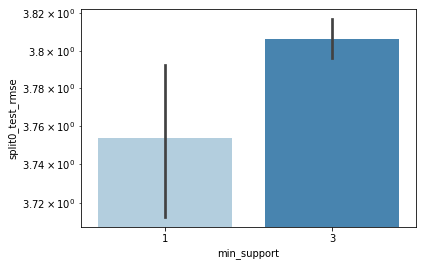

In [8]:
sns.barplot(x=results_df['min_support'], y=results_df['split0_test_rmse'], palette='Blues')
plt.yscale('log')

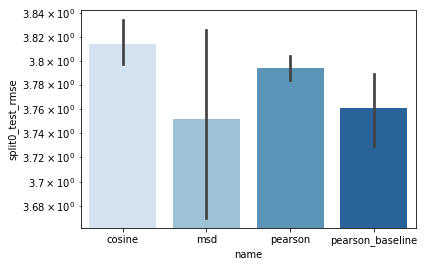

In [9]:
sns.barplot(x=results_df['name'], y=results_df['split0_test_rmse'], palette='Blues')
plt.yscale('log')

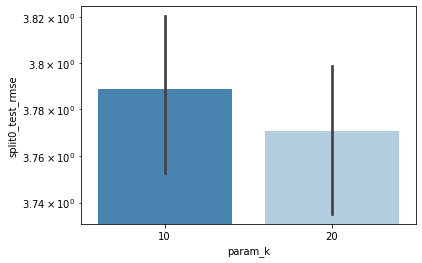

In [10]:
sns.barplot(x=results_df['param_k'], y=results_df['split0_test_rmse'], palette='Blues_r')
plt.yscale('log')

## get top-N recommendations for each user
Source: [documentation](https://surprise.readthedocs.io/en/stable/FAQ.html)

We first train an SVD algorithm on the whole dataset, and then predict all the ratings for the pairs (user, item) that are not in the training set. We then retrieve the top-10 prediction for each user.

In [27]:
def get_top_n(predictions, n=10):
    """
    Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [30]:
trainset, testset = train_test_split(data, test_size=.25)

In [28]:
algo = KNNWithMeans(k=20, 
                    sim_options={'name':'msd', 'min_support':1, 
                                 'user_based':False})

In [31]:
predictions = algo.fit(trainset).test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
#top_10 = get_top_n(predictions, n=10)

In [ ]:
# # Print the recommended items for each user
# for uid, user_ratings in top_10.items():
#     pass
#     #print(uid, [bid for (bid, _) in user_ratings])

In [32]:
test_df = pd.DataFrame(testset, columns=['uid', 'bid', 'rating'])
test_df.head(3)

,uid,bid,rating
0,33006,044922046X,6.0
1,274423,0671760513,6.0
2,115002,0380016990,3.0


In [ ]:
#test_df[test_df['uid']==115003]

In [ ]:
#top_10[115003]

In [ ]:
# bought = set(test_df[test_df['uid']==115003]['bid'])
# predicted = set([bid for bid, rating in top_10[115003]])
# bought.intersection(predicted)

In [ ]:
# # the rate our recommended books in user's bought list
# len(bought.intersection(predicted)) / len(predicted)

In [35]:
n = 10
top_n = get_top_n(predictions, n=n)
accuracy = []

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    bought = set(test_df[test_df['uid']==uid].sort_values(
        by='rating', ascending=False)[:n]['bid'])
    predicted = set([bid for bid, rating in user_ratings])
    rate = len(bought.intersection(predicted)) / len(predicted)
    accuracy.append(rate)
print(sum(accuracy)/len(accuracy))

0.9172607286809454


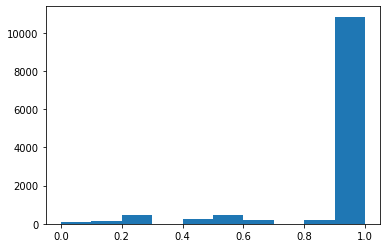

In [36]:
plt.hist(accuracy)
plt.show()

## Issues in collaborative filtering

* Sparseness in user-item matrix (sparsity=$1-|R|/|I|*|U|$)
* Cold start for users and items

Next, we would try to resolve these issues using matrix factorization.